In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

air_passenger_data = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')
air_passenger_data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
air_passenger_data.rename(columns={"Month": 'ds', '#Passengers':'y'}, inplace=True)
air_passenger_data


,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsz_6hg51/zf20xg21.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsz_6hg51/3vjtc6ni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14067', 'data', 'file=/tmp/tmpsz_6hg51/zf20xg21.json', 'init=/tmp/tmpsz_6hg51/3vjtc6ni.json', 'output', 'file=/tmp/tmpsz_6hg51/prophet_modelnykc4wm3/prophet_model-20230416211536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:15:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


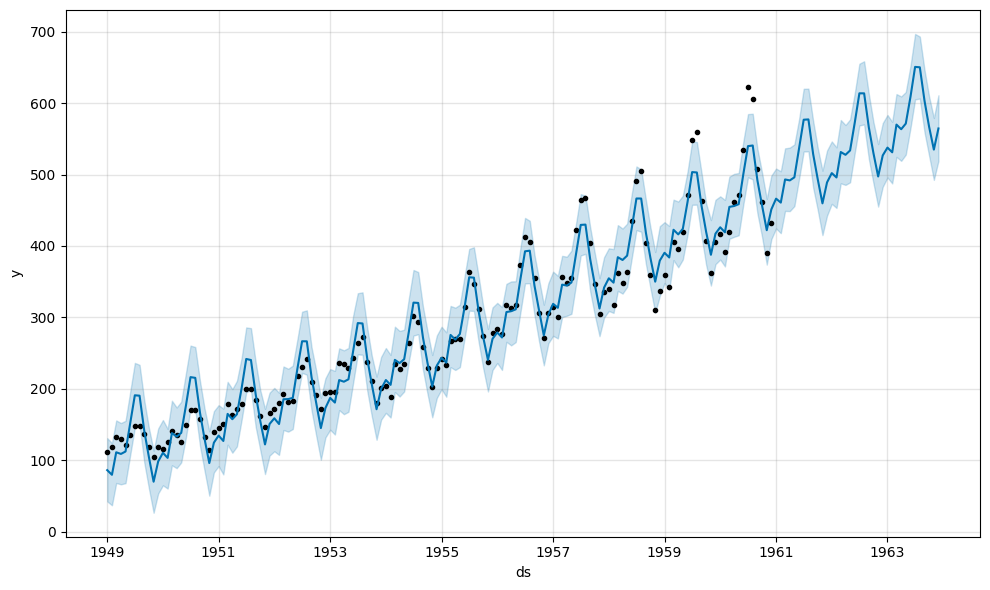

In [ ]:
# Fitting model
my_model = Prophet(interval_width=0.95)
my_model.fit(air_passenger_data)

future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
forecast = my_model.predict(future_dates)
my_model.plot(forecast, uncertainty=True);

In [ ]:
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
175,1963-08-01,582.644882,610.935197,692.537112,577.829789,587.376750,67.607366,67.607366,67.607366,67.607366,67.607366,67.607366,0.0,0.0,0.0,650.252248
176,1963-09-01,585.770722,554.202419,646.608307,580.699790,590.765347,17.234595,17.234595,17.234595,17.234595,17.234595,17.234595,0.0,0.0,0.0,603.005317
177,1963-10-01,588.795728,521.611802,610.372686,583.501953,594.045294,-22.023296,-22.023296,-22.023296,-22.023296,-22.023296,-22.023296,0.0,0.0,0.0,566.772432
178,1963-11-01,591.921568,494.428672,577.579496,586.368780,597.348231,-56.971509,-56.971509,-56.971509,-56.971509,-56.971509,-56.971509,0.0,0.0,0.0,534.950059
179,1963-12-01,594.946574,522.124431,613.595993,589.204159,600.499741,-30.379002,-30.379002,-30.379002,-30.379002,-30.379002,-30.379002,0.0,0.0,0.0,564.567572


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.252248,610.935197,692.537112
176,1963-09-01,603.005317,554.202419,646.608307
177,1963-10-01,566.772432,521.611802,610.372686
178,1963-11-01,534.950059,494.428672,577.579496
179,1963-12-01,564.567572,522.124431,613.595993


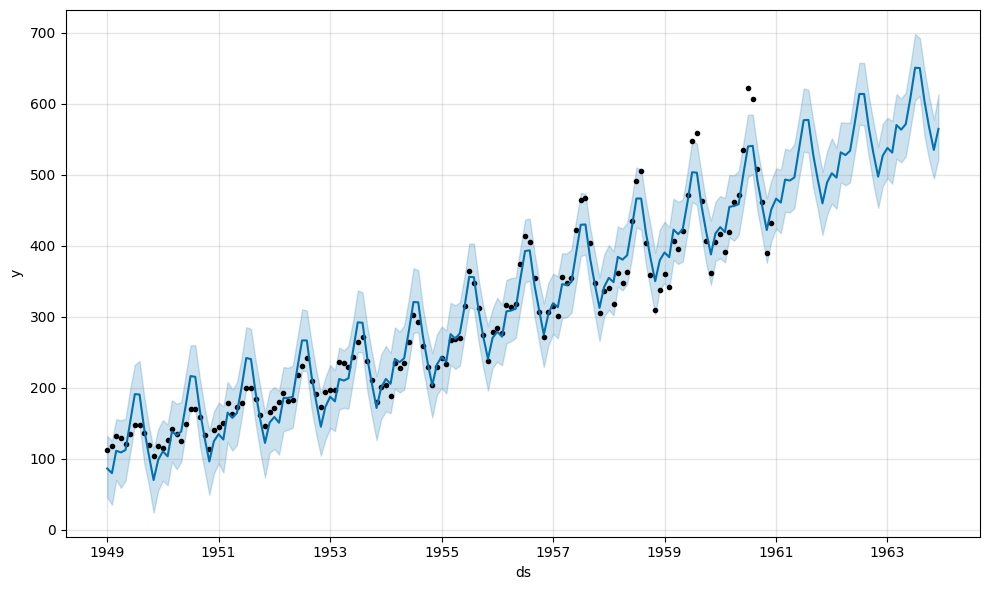

In [ ]:
my_model.plot(forecast,
              uncertainty=True);

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [ ]:
# my_model.fit(air_passenger_data)

In [ ]:
air_passenger_data.rename(columns={"Month": 'ds', '#Passengers':'y'}, inplace=True)
air_passenger_data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Additive model

In [ ]:
my_model.fit(air_passenger_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsz_6hg51/e_spwfop.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsz_6hg51/7f_vpn_8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30163', 'data', 'file=/tmp/tmpsz_6hg51/e_spwfop.json', 'init=/tmp/tmpsz_6hg51/7f_vpn_8.json', 'output', 'file=/tmp/tmpsz_6hg51/prophet_model5nhai1py/prophet_model-20230416211619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:16:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:16:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
175,1963-08-01,582.644882,604.886635,697.516378,577.567641,587.694326,67.607366,67.607366,67.607366,67.607366,67.607366,67.607366,0.0,0.0,0.0,650.252248
176,1963-09-01,585.770722,556.082968,645.108685,580.415391,591.045014,17.234595,17.234595,17.234595,17.234595,17.234595,17.234595,0.0,0.0,0.0,603.005317
177,1963-10-01,588.795728,521.114071,612.757018,583.280521,594.275132,-22.023296,-22.023296,-22.023296,-22.023296,-22.023296,-22.023296,0.0,0.0,0.0,566.772432
178,1963-11-01,591.921568,491.717618,579.260996,586.194010,597.612330,-56.971509,-56.971509,-56.971509,-56.971509,-56.971509,-56.971509,0.0,0.0,0.0,534.950059
179,1963-12-01,594.946574,523.941357,609.902655,589.034652,600.903998,-30.379002,-30.379002,-30.379002,-30.379002,-30.379002,-30.379002,0.0,0.0,0.0,564.567572


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.252248,604.886635,697.516378
176,1963-09-01,603.005317,556.082968,645.108685
177,1963-10-01,566.772432,521.114071,612.757018
178,1963-11-01,534.950059,491.717618,579.260996
179,1963-12-01,564.567572,523.941357,609.902655


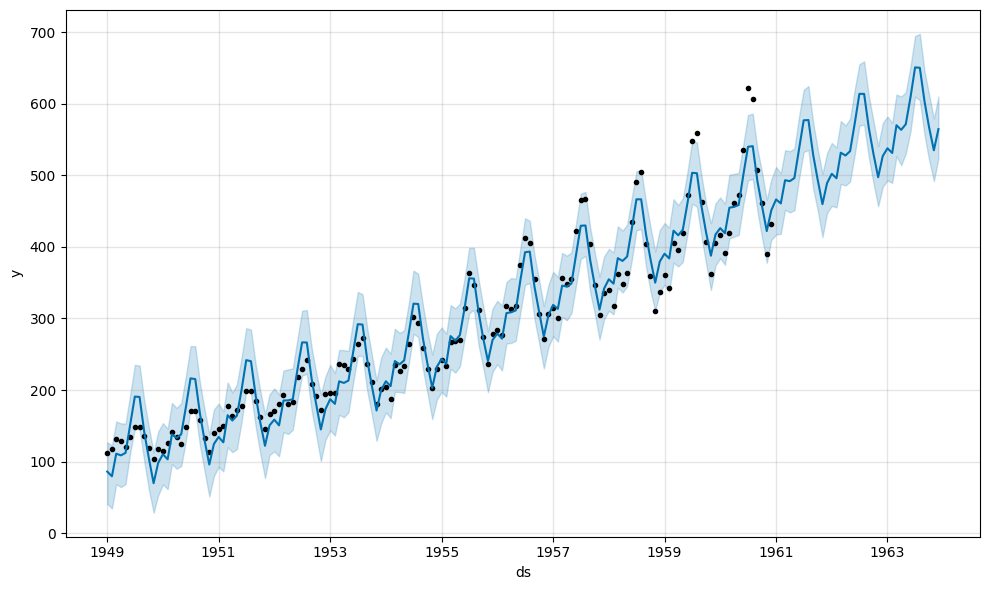

In [ ]:
my_model.plot(forecast,
              uncertainty=True);

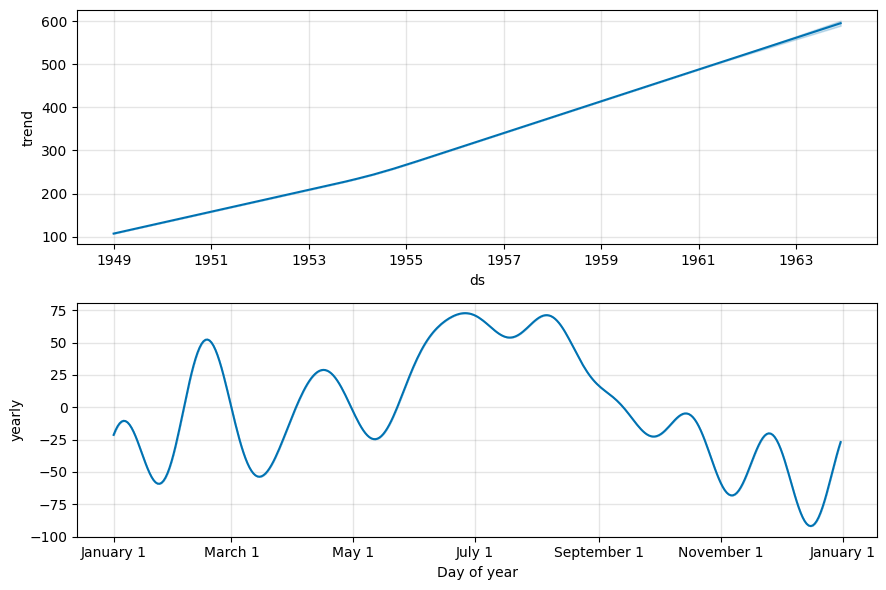

In [ ]:
my_model.plot_components(forecast);


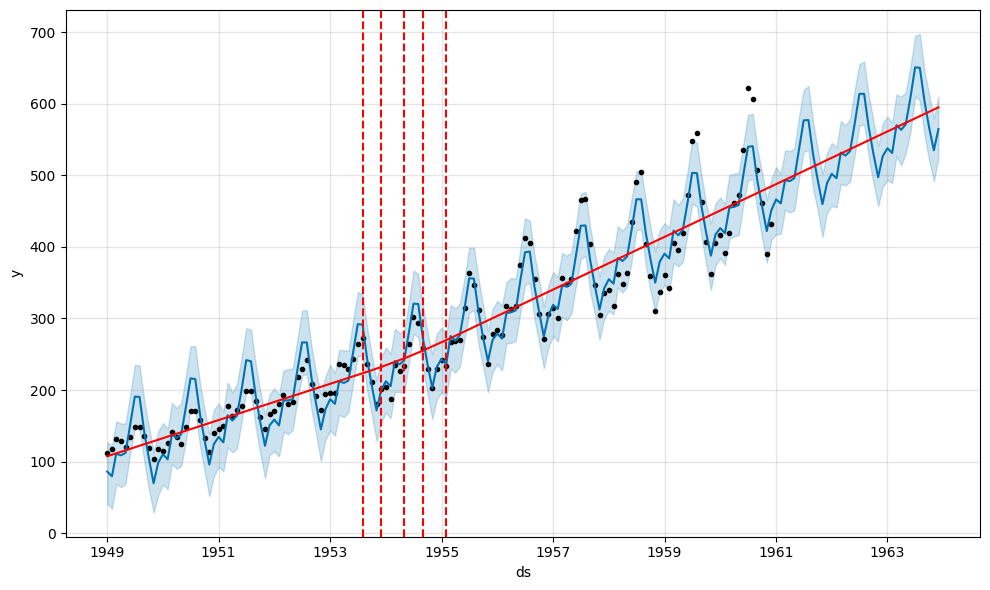

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig_air=my_model.plot(forecast)
a=add_changepoints_to_plot(fig_air.gca(),my_model, forecast)

# Multiplicative

In [ ]:
my_model_multiplicative = Prophet(interval_width=0.95, seasonality_mode='multiplicative')

In [ ]:
my_model_multiplicative.fit(air_passenger_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsz_6hg51/j68azsfp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsz_6hg51/i1vndj57.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4686', 'data', 'file=/tmp/tmpsz_6hg51/j68azsfp.json', 'init=/tmp/tmpsz_6hg51/i1vndj57.json', 'output', 'file=/tmp/tmpsz_6hg51/prophet_modeldb94lwgv/prophet_model-20230416211643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:16:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:16:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = my_model_multiplicative.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [ ]:
forecast = my_model_multiplicative.predict(future_dates)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
175,1963-08-01,606.350043,735.935083,795.069875,588.456413,625.241841,0.264631,0.264631,0.264631,0.264631,0.264631,0.264631,0.0,0.0,0.0,766.809058
176,1963-09-01,609.968993,620.431463,677.072015,591.228404,629.787967,0.062259,0.062259,0.062259,0.062259,0.062259,0.062259,0.0,0.0,0.0,647.945046
177,1963-10-01,613.471202,536.750460,589.058408,593.955441,634.217352,-0.083052,-0.083052,-0.083052,-0.083052,-0.083052,-0.083052,0.0,0.0,0.0,562.521262
178,1963-11-01,617.090152,466.595887,516.281158,596.634011,638.747201,-0.203548,-0.203548,-0.203548,-0.203548,-0.203548,-0.203548,0.0,0.0,0.0,491.482482
179,1963-12-01,620.592362,524.563760,576.993399,599.128184,643.140914,-0.113234,-0.113234,-0.113234,-0.113234,-0.113234,-0.113234,0.0,0.0,0.0,550.320138


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,766.809058,735.935083,795.069875
176,1963-09-01,647.945046,620.431463,677.072015
177,1963-10-01,562.521262,536.750460,589.058408
178,1963-11-01,491.482482,466.595887,516.281158
179,1963-12-01,550.320138,524.563760,576.993399


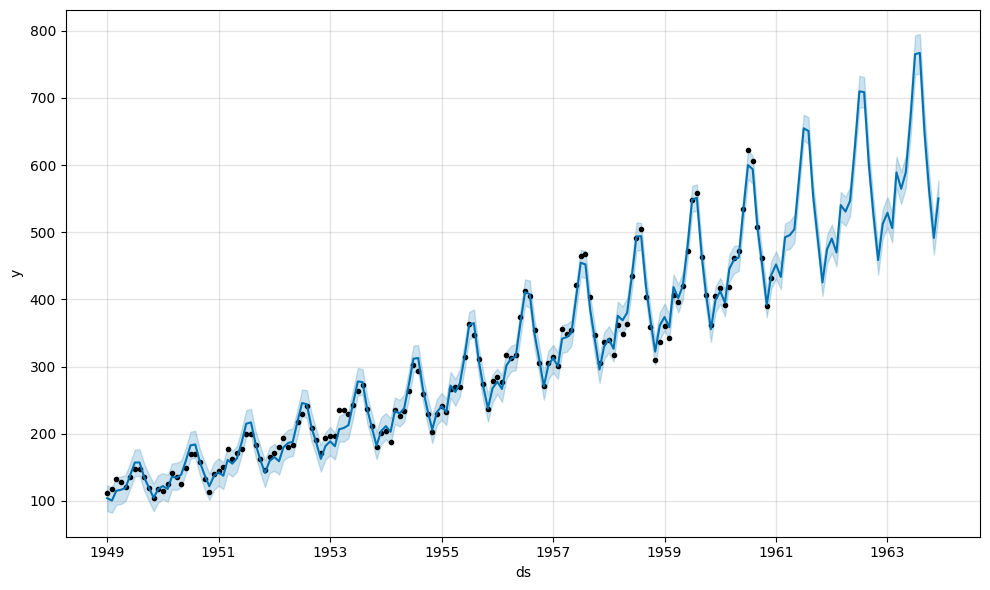

In [ ]:
my_model_multiplicative.plot(forecast,
              uncertainty=True);

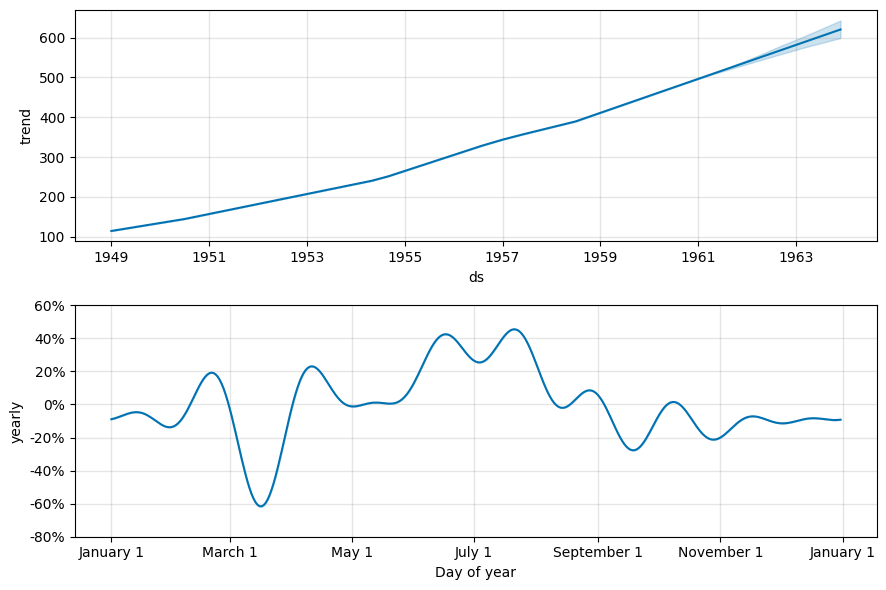

In [ ]:
my_model_multiplicative.plot_components(forecast);


In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig_air=my_model_multiplicative.plot(forecast)
a=add_changepoints_to_plot(fig_air.gca(),my_model_multiplicative, forecast)

ModuleNotFoundError: ignored